In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('modstudent.csv')
df.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,0,s00001,2,3,0.409,0.514,0.409,6,0,2,1,310,262,28.0,1985.0
1,0,s00002,2,2,0.290,0.512,0.290,4,7,2,1,328,356,14.0,1943.0
2,0,s00003,2,1,0.602,0.666,0.602,4,2,2,0,322,179,8.0,1955.0
3,0,s00004,2,2,0.378,0.526,0.378,8,7,2,1,305,354,86.0,1986.0
4,0,s00005,2,1,0.536,0.614,0.536,9,4,0,1,360,273,2.0,1995.0


In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
X = df[[ 'gender', 'caste', 'mathematics_marks','english_marks', 'science_marks', 'science_teacher','languages_teacher', 'guardian', 'internet', 'school_id','total_students', 'total_toilets', 'establishment_year']]
y=df['continue_drop']

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'NODES vs ACCURACY')

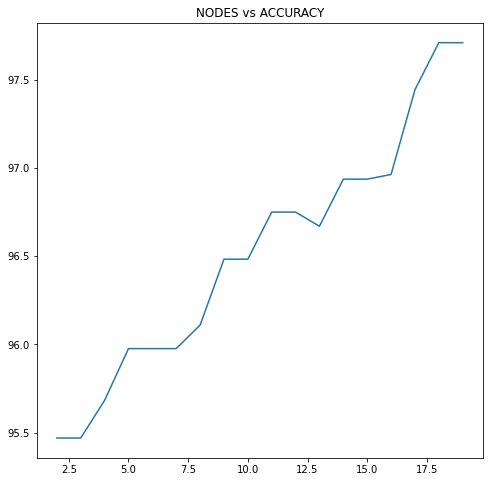

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gx = []
gy = []
for i in range (2,20):
    gx.append(i)
    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=i,random_state=0)
    dtree.fit(X_train,y_train)
    gy.append(100*dtree.score(X_test,y_test))
plt.figure(figsize=(8,8))
plt.plot(gx,gy)
plt.title("NODES vs ACCURACY")

In [6]:
import time
t1 = time.perf_counter()
dtree = tree.DecisionTreeClassifier(max_leaf_nodes=5,random_state=0)
dtree.fit(X_train,y_train)
t2=time.perf_counter()
print("elapsed time is :",(t2-t1))

elapsed time is : 0.02280260000000567


In [7]:
import graphviz
from sklearn.tree import export_graphviz
import itertools

In [8]:

export_graphviz(dtree,
                feature_names=list(X.columns.values),
                out_file="dtree.dot",
                class_names=['drop','no drop'],
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)


In [9]:
with open("dtree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()


In [10]:

import pydot

(graph,) = pydot.graph_from_dot_file('dtree.dot')
graph.write_png('dtree.png')